## Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, проведем разведывательный анализ данных и составим отчёт по его результатам. 

## 1. Первичный анализ данных в столбцах

In [1]:
# Импортируем необходимые для чтения и первичного анализа библиотеки: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# открываем файл и присваиваем нашему датасету название
math_progress = pd.read_csv('stud_math.csv')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(math_progress.head())
math_progress.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В нашем датасете 3 числовых столбца и 27 с номинативными данными. 

При этом у некторых столбцов названия начинаются с большой буквы, что в дальнейшем будет неудобно пр обработке датасета. 

Давайте приведем наименования столбцов к удобному для работы виду.

In [3]:
# Для изменения регистра букв используем функцию python -  lower()
math_progress.columns = [x.lower() for x in math_progress.columns]
math_progress.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Так же, в 27-ми столбцах присутствуют пропущенные значения. При этом, отсутствие значений в 17 столбцах может привести к некорректным вычислениям в дальнейшем.

Заполним пропуски в столбцах с типом object на значение "None" которое будет восприниматься python корректно. None обычно используют для обозначения того, что конкретное значение отсуствует.  

Чтобы избавиться от рутинной работы с каждым столбцом, для этого напишем функцию и передадим в нее рассматриваемый датафрэйм:  

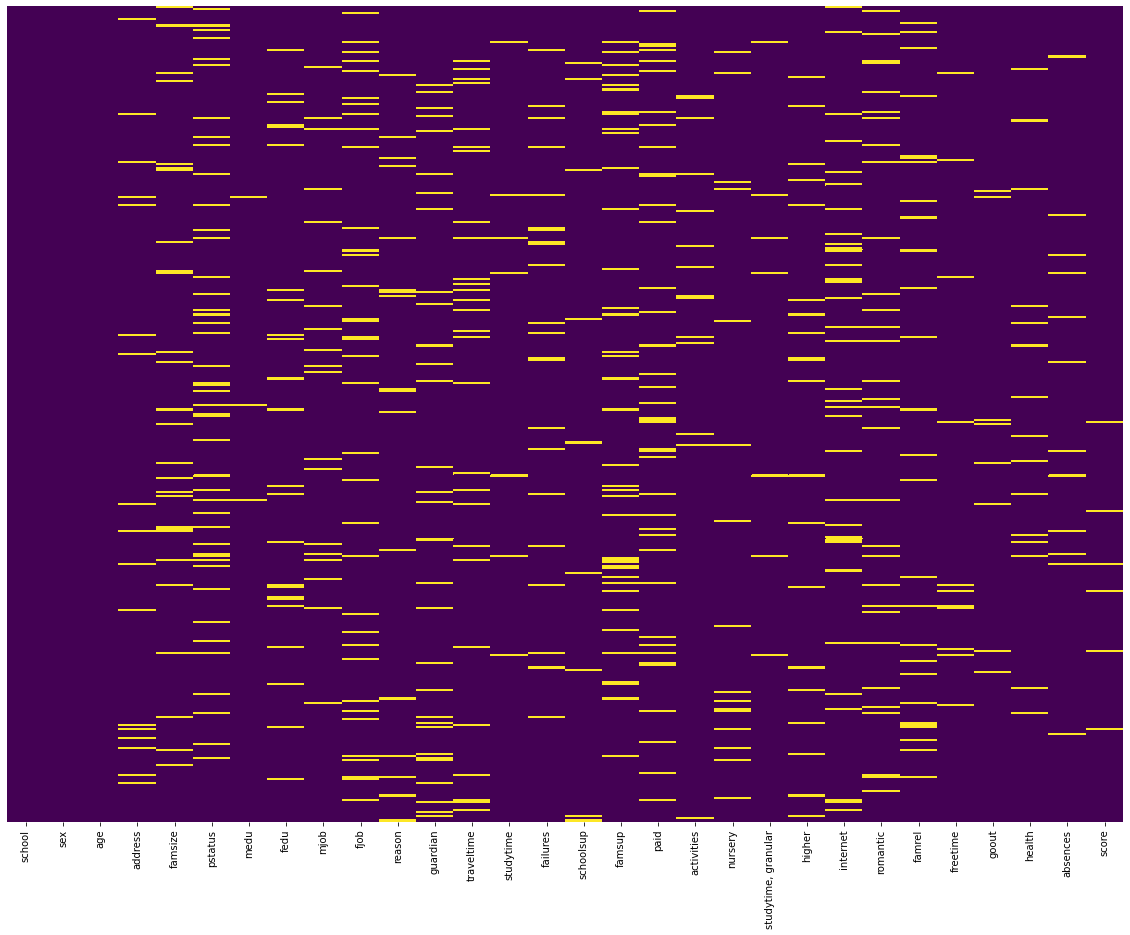

In [4]:
# проверяем пропуски визуально 
fig, ax = plt.subplots(figsize = (20,15))
sns_heatmap = sns.heatmap(math_progress.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [5]:
""" Функция replace_none_value получает на вход весь датафрэйм, одбирает столбцы содержащие
значения с типом object ('O'), меняет пропущенные значения в столбцах на "None" 
и возвращает измененный датафрэйм """


def replace_none_value(df):
    for col in math_progress.columns:
        if df[col].dtype == 'O':
            df[col] = df[col].astype(str).apply(lambda x: None if pd.isnull(x)
                                        else None if 'nan' in x else None if x.strip() == '' else x)
        else:
            continue
    return df

In [8]:
# Передаем датафрэйм в функцию
replace_none_value(math_progress)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,None,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,-3.0,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [9]:
# Проверим корректность работы функции
math_progress.info()
for col in math_progress.columns:
    print(sorted(math_progress[col].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   pstatus              395 non-null    object 
 6   medu                 392 non-null    float64
 7   fedu                 371 non-null    float64
 8   mjob                 395 non-null    object 
 9   fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            395 non-null    obj

Функция отработала правильно. Теперь рассмотрим все 30 (!) столбцов по отдельности.

### school - аббревиатура школы, в которой учится ученик

Здесь и далее для оценки уникальных значений мы будем использовать функцию value_counts.

In [10]:
display(pd.DataFrame(math_progress.school.value_counts()))

,school
GP,349
MS,46


Значения в этом столбце представлены, без пропусков, в виде аббревиатур 2-х школ, в которых учатся ученики. Количество уникальных значений соответствует количеству строк. Оставляем этот столбец без изменений.

### sex - пол ученика ('F' - женский, 'M' - мужской)

In [13]:
display(pd.DataFrame(math_progress.sex.value_counts()))

,sex
F,208
M,187


В этом нечисловом столбце указан пол ученика ('F' - женский, 'M' - мужской). Этот столбец без пропусков и вероятно может понадобиться нам для дальнейшего анализа. Поэтому оставляем данный столбец без изменений.

### age - возраст ученика (от 15 до 22)

Данный столбец числовой и содержит возраст ученика (от 15 до 22)

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


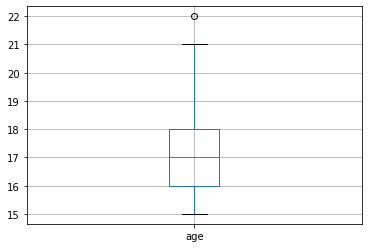

In [11]:
display(pd.DataFrame(math_progress.age.value_counts(dropna=False)))
math_progress.boxplot(column=['age'])
print(math_progress.age.describe())

Похоже в этом столбце присутствуют выброс (age = 22) так как основное распределение данных лежит в интервале от 15 до 21. Воспользуемся формулой интерквартильного расстояния (межквартильного размаха). 

Выбросом считаются такие значения, которые лежат вне рамок:

percentile(25) -1.5*IQR : percentile(75)+1.5*IQR,
где IQR = percentile(75) - percentile(25).

Давайте это проверим

In [12]:
median = math_progress.age.median()
IQR = math_progress.age.quantile(0.75) - math_progress.age.quantile(0.25)
perc25 = math_progress.age.quantile(0.25)
perc75 = math_progress.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                                      l=perc75 + 1.5*IQR))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Вышеуказанное значение оказалось выбросом. Тем не менее, оставим столбец без изменений так как возраст 22 входит в интервал значений столбца согласно заданию. 

### address - тип адреса ученика ('U' - городской, 'R' - за городом)

In [13]:
display(pd.DataFrame(math_progress.address.value_counts()))
math_progress.address.value_counts(normalize=True)

,address
U,295
R,83
None,17


U       0.746835
R       0.210127
None    0.043038
Name: address, dtype: float64

В столбце присутствуют 17 значений "None" или 4% от всех значений столбца. Так как мы не знаем как измениться модель при удалении этих строк, на данном этапе оставим столбец без изменений. 

### famsize - размер семьи('LE3' <= 3, 'GT3' >3)

In [14]:
display(pd.DataFrame(math_progress.famsize.value_counts()))
math_progress.famsize.value_counts(normalize=True)

,famsize
GT3,261
LE3,107
None,27


GT3     0.660759
LE3     0.270886
None    0.068354
Name: famsize, dtype: float64

В столбце присутствуют 27 отсутствующих значений или 7% от всех значений столбца. На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений. 

### pstatus -  статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [15]:
display(pd.DataFrame(math_progress.pstatus.value_counts()))
math_progress.pstatus.value_counts(normalize=True)

,pstatus
T,314
None,45
A,36


T       0.794937
None    0.113924
A       0.091139
Name: pstatus, dtype: float64

В столбце присутствуют 45 отсутствующих значений или 11% от всех значений столбца, что довольно странно. На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому оставим столбец без изменений. 

### medu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


4.0    0.331646
2.0    0.258228
3.0    0.245570
1.0    0.149367
0.0    0.007595
NaN    0.007595
Name: medu, dtype: float64

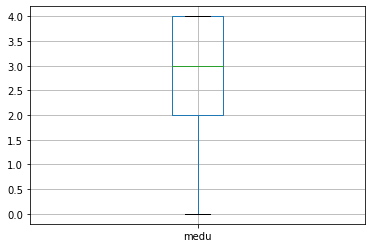

In [16]:
display(pd.DataFrame(math_progress.medu.value_counts(dropna=False)))
display(math_progress.medu.value_counts(dropna=False, normalize=True))
math_progress.boxplot(column=['medu'])

Это числовой столбец с номинативными данными, без выбросов. Количество отсутствующих данных не превышает 3. Оставляем столбец без изменений. 

### fedu - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


2.0     0.268354
3.0     0.243038
4.0     0.222785
1.0     0.197468
NaN     0.060759
0.0     0.005063
40.0    0.002532
Name: fedu, dtype: float64

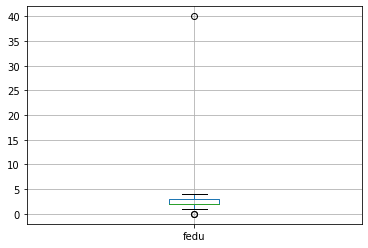

In [17]:
display(pd.DataFrame(math_progress.fedu.value_counts(dropna=False)))
display(math_progress.fedu.value_counts(dropna=False, normalize=True))
math_progress.boxplot(column=['fedu'])

В данном числовом столбце с номинативными данными отсутствует "24" значения и не превышает 6% всех значений столбца. Как показывает график, присутствуют выбросы.

Возможно значения выброса равное "40" является ошибкой и на самом деле равно "4". Чтобы исправить ошибку применим к значениям столбца lambda функцию: 

In [11]:
math_progress.fedu = math_progress.fedu.apply(lambda x: 4.0 if x == 40 else x)

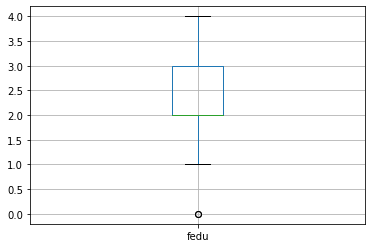

In [12]:
# и посмотрим, что получилось:
math_progress.boxplot(column=['fedu'])

Остался один выброс со значением "0". Однако на данном этапе мы не будем его исключать так как мы знаем, что номинативное значение "0" означает, что у отца нет образования и это может исказить общий результат вцелом.

### mjob - работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [20]:
display(pd.DataFrame(math_progress.mjob.value_counts()))
display(math_progress.mjob.value_counts(normalize=True))

,mjob
other,133
services,98
at_home,58
teacher,55
health,32
None,19


other       0.336709
services    0.248101
at_home     0.146835
teacher     0.139241
health      0.081013
None        0.048101
Name: mjob, dtype: float64

Это нечисловой столбец в котором количество отсутствующих значений 19 и не превышает 5% от общего числа. 

Так как в этом столбце есть значение "other - другое" с точки зрения здравого смысла, можно заменить значения "None" на "other". Для этого используем lambda функцию:

In [13]:
math_progress.mjob = math_progress.mjob.apply(lambda x: 'other' if x == 'None' else x)

In [22]:
# Проверим, что получилось:
display(pd.DataFrame(math_progress.mjob.value_counts()))
display(math_progress.mjob.value_counts(normalize=True))

,mjob
other,152
services,98
at_home,58
teacher,55
health,32


other       0.384810
services    0.248101
at_home     0.146835
teacher     0.139241
health      0.081013
Name: mjob, dtype: float64

### fjob - работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [23]:
display(pd.DataFrame(math_progress.fjob.value_counts()))
display(math_progress.fjob.value_counts(normalize=True))

,fjob
other,197
services,102
None,36
teacher,29
at_home,16
health,15


other       0.498734
services    0.258228
None        0.091139
teacher     0.073418
at_home     0.040506
health      0.037975
Name: fjob, dtype: float64

Это нечисловой столбец в котором количество отсутствующих значений 36 и не превышает 9% от общего числа. 

Так как в этом столбце есть значение "other - другое" с точки зрения здравого смысла, можно заменить значения "None" на "other". Для этого используем lambda функцию:

In [14]:
math_progress.fjob = math_progress.fjob.apply(lambda x: 'other' if x == 'None' else x)

In [15]:
# Проверяем, что получилось в итоге:
display(pd.DataFrame(math_progress.fjob.value_counts()))
display(math_progress.fjob.value_counts(normalize=True))

,fjob
other,233
services,102
teacher,29
at_home,16
health,15


other       0.589873
services    0.258228
teacher     0.073418
at_home     0.040506
health      0.037975
Name: fjob, dtype: float64

### reason - причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [26]:
display(pd.DataFrame(math_progress.reason.value_counts()))
display(math_progress.reason.value_counts(normalize=True))

,reason
course,137
home,104
reputation,103
other,34
None,17


course        0.346835
home          0.263291
reputation    0.260759
other         0.086076
None          0.043038
Name: reason, dtype: float64

Это нечисловой столбец в котором количество отсутствующих значений 17 и не превышает 4% от общего числа. 

Так как в этом столбце есть значение "other - другое" с точки зрения здравого смысла, можно заменить значения "None" на "other". Для этого используем lambda функцию:

In [16]:
math_progress.reason = math_progress.reason.apply(lambda x: 'other' if x == 'None' else x)

In [17]:
# проверим корректность работы кода:
display(pd.DataFrame(math_progress.reason.value_counts()))
display(math_progress.reason.value_counts(normalize=True))

,reason
course,137
home,104
reputation,103
other,51


course        0.346835
home          0.263291
reputation    0.260759
other         0.129114
Name: reason, dtype: float64

### guardian - опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [29]:
display(pd.DataFrame(math_progress.guardian.value_counts()))
display(math_progress.guardian.value_counts(normalize=True))

,guardian
mother,250
father,86
None,31
other,28


mother    0.632911
father    0.217722
None      0.078481
other     0.070886
Name: guardian, dtype: float64

Это нечисловой столбец в котором количество отсутствующих значений 31 или 8% от общего числа значений. 

Производим теже манипуляции как в столбцах выше:

In [18]:
math_progress.guardian = math_progress.guardian.apply(lambda x: 'other' if x == 'None' else x)

In [19]:
# Проверка:
display(pd.DataFrame(math_progress.guardian.value_counts()))
display(math_progress.guardian.value_counts(normalize=True))

,guardian
mother,250
father,86
other,59


mother    0.632911
father    0.217722
other     0.149367
Name: guardian, dtype: float64

### traveltime - время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


1.0    0.612658
2.0    0.243038
NaN    0.070886
3.0    0.055696
4.0    0.017722
Name: traveltime, dtype: float64

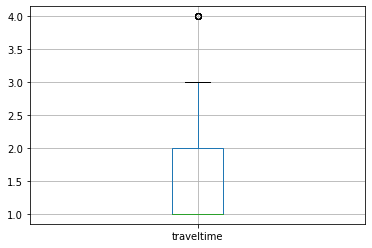

In [32]:
display(pd.DataFrame(math_progress.traveltime.value_counts(dropna=False)))
display(math_progress.traveltime.value_counts(dropna=False, normalize=True))
math_progress.boxplot(column=['traveltime'])

Это числовой столбец с номинативными данными и выбросами в значении "4". Количество отсутствующих данных равно 28 и не превышает 7% от общего числа значений. 

На данном этапе мы не будем его исключать так как мы знаем, что номинативное значение "4" означает, что время в пути превышает 60 минут и это может исказить общий результат в целом.  Оставляем столбец без изменений. 

### studytime -  время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


2.0    0.491139
1.0    0.260759
3.0    0.162025
4.0    0.068354
NaN    0.017722
Name: studytime, dtype: float64

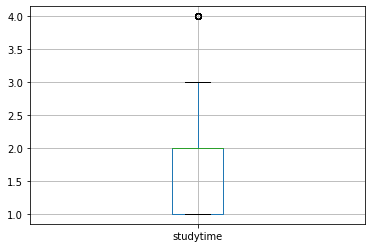

In [33]:
display(pd.DataFrame(math_progress.studytime.value_counts(dropna=False)))
display(math_progress.studytime.value_counts(dropna=False, normalize=True))
math_progress.boxplot(column=['studytime'])

Это числовой столбец с номинативными данными и выбросами в значении "4". Количество отсутствующих данных равно 5 и не превышает 1% от общего числа значений. На данном этапе мы не будем его исключать так как мы знаем, что номинативное значение "4" означает, что время на учебу помимо школы в неделю превышает 10 часов и это может исказить общий результат в целом.  Оставляем столбец без изменений.

### failures - количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


0.0    0.741772
1.0    0.124051
NaN    0.055696
2.0    0.040506
3.0    0.037975
Name: failures, dtype: float64

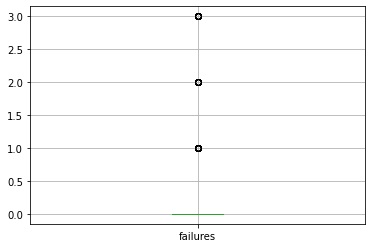

In [20]:
display(pd.DataFrame(math_progress.failures.value_counts(dropna=False)))
display(math_progress.failures.value_counts(dropna=False, normalize=True))
math_progress.boxplot(column=['failures'])

Это числовой столбец с номинативными данными с большим количеством выбросов. Количество отсутствующих данных равно 22 и не превышает 6% от общего числа значений

На данном этапе мы не будем исключать выбросы так как с точки зрения здравого смысла, отсутствие этих данных   может исказить общий результат в целом.  Оставляем столбец без изменений.

### schoolsup - дополнительная образовательная поддержка (yes или no)

In [35]:
display(pd.DataFrame(math_progress.schoolsup.value_counts()))
display(math_progress.schoolsup.value_counts(normalize=True))

,schoolsup
no,335
yes,51
None,9


no      0.848101
yes     0.129114
None    0.022785
Name: schoolsup, dtype: float64

В столбце 9 отсутствующих значений или 2% от всех значений столбца. 

На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений. 

### famsup - семейная образовательная поддержка (yes или no)

In [36]:
display(pd.DataFrame(math_progress.famsup.value_counts()))
display(math_progress.famsup.value_counts(normalize=True))

,famsup
yes,219
no,137
None,39


yes     0.554430
no      0.346835
None    0.098734
Name: famsup, dtype: float64

В столбце 39 отсутствующих значений или 10% от общего числа.

В дальнейшем возможно придется исключить данный столбец из модели из-за большого количества пропусков.

### paid - дополнительные платные занятия по математике (yes или no)

In [37]:
display(pd.DataFrame(math_progress.paid.value_counts()))
display(math_progress.paid.value_counts(normalize=True))

,paid
no,200
yes,155
None,40


no      0.506329
yes     0.392405
None    0.101266
Name: paid, dtype: float64

В столбце 39 отсутствующих значений или 10% от общего числа.

В дальнейшем возможно придется исключить данный столбец из модели из-за большого количества пропусков.

### activities - дополнительные внеучебные занятия (yes или no)

In [38]:
display(pd.DataFrame(math_progress.activities.value_counts()))
display(math_progress.activities.value_counts(normalize=True))

,activities
yes,195
no,186
None,14


yes     0.493671
no      0.470886
None    0.035443
Name: activities, dtype: float64

В столбце 14 отсутствующих значений или 3,5% от общего числа значений.

На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений.

### nursery - посещал детский сад (yes или no)

In [39]:
display(pd.DataFrame(math_progress.nursery.value_counts()))
display(math_progress.nursery.value_counts(normalize=True))

,nursery
yes,300
no,79
None,16


yes     0.759494
no      0.200000
None    0.040506
Name: nursery, dtype: float64

В столбце 16 отсутствующих значений или 4% от общего числа значений.

На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений.

### studytime, granular

In [40]:
display(pd.DataFrame(math_progress['studytime, granular'].value_counts()))
display(math_progress['studytime, granular'].value_counts(normalize=True))

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


-6.0     0.500000
-3.0     0.265464
-9.0     0.164948
-12.0    0.069588
Name: studytime, granular, dtype: float64

Числовой столбец с отрицательными значениями отсутствует в исходных данных текущего задания и в датафрэйме уже есть столбец с таким названием.

Исключим данный столбец из датафрэйма чтобы избежать его влияния на итоговый результат.

In [21]:
math_progress.drop(['studytime, granular'], inplace=True, axis=1)

In [42]:
# Проверка:
math_progress.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


### higher - хочет получить высшее образование (yes или no)

In [43]:
display(pd.DataFrame(math_progress.higher.value_counts()))
display(math_progress.higher.value_counts(normalize=True))

,higher
yes,356
None,20
no,19


yes     0.901266
None    0.050633
no      0.048101
Name: higher, dtype: float64

В столбце 20 отсутствующих значений или 5% от общего числа значений.

На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений.

### internet -  наличие интернета дома (yes или no)

In [44]:
display(pd.DataFrame(math_progress.internet.value_counts()))
display(math_progress.internet.value_counts(normalize=True))

,internet
yes,305
no,56
None,34


yes     0.772152
no      0.141772
None    0.086076
Name: internet, dtype: float64

В столбце 34 отсутствующих значения или 9% от общего числа значений.

На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений.

### romantic -  в романтических отношениях (yes или no)

In [45]:
display(pd.DataFrame(math_progress.romantic.value_counts()))
display(math_progress.romantic.value_counts(normalize=True))

,romantic
no,240
yes,124
None,31


no      0.607595
yes     0.313924
None    0.078481
Name: romantic, dtype: float64

В столбце 31 отсутствуюе значение или 8% от общего числа значений.

На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений.

### famrel - семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


 4.0    0.460759
 5.0    0.250633
 3.0    0.156962
 NaN    0.068354
 2.0    0.043038
 1.0    0.017722
-1.0    0.002532
Name: famrel, dtype: float64

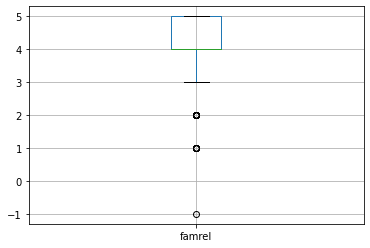

In [46]:
display(pd.DataFrame(math_progress.famrel.value_counts(dropna=False)))
display(math_progress.famrel.value_counts(dropna=False, normalize=True))
math_progress.boxplot(column=['famrel'])

Столбец с номинативными данными в котором есть выбросы и видимо одна ошибка (-1). В столбце 27 пропущенных значений или 7%.

In [47]:
# Проверим наличие выбросов:
median = math_progress.famrel.median()
IQR = math_progress.famrel.quantile(0.75) - math_progress.famrel.quantile(0.25)
perc25 = math_progress.famrel.quantile(0.25)
perc75 = math_progress.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".
      format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


На данном этапе выбросы исключать не будем а вот ошибку нужно исправить с помощью lambda функции:

In [22]:
math_progress.famrel = math_progress.famrel.apply(
    lambda x: 1 if x == -1 else x)

In [23]:
# Проверка:
display(pd.DataFrame(math_progress.famrel.value_counts(dropna=False)))
display(math_progress.famrel.value_counts(normalize=True))

,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,8


4.0    0.494565
5.0    0.269022
3.0    0.168478
2.0    0.046196
1.0    0.021739
Name: famrel, dtype: float64

### freetime - свободное время после школы (от 1 - очень мало до 5 - очень мого)

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
NaN,11


3.0    0.387342
4.0    0.283544
2.0    0.159494
5.0    0.096203
1.0    0.045570
NaN    0.027848
Name: freetime, dtype: float64

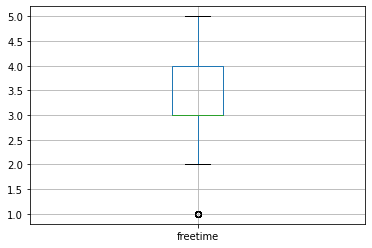

In [50]:
display(pd.DataFrame(math_progress.freetime.value_counts(dropna=False)))
display(math_progress.freetime.value_counts(dropna=False, normalize=True))
math_progress.boxplot(column=['freetime'])

Столбец с номинативными данными в котором есть выбросы в значении "1". В столбце 11 пропущенных значений или 3%. 

На данном этапе не будем исключать выбросы так как знаем, что значение "1" означает очень мало свободного времени. Оставляем столбец без изменений.

### goout - проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8


3.0    0.321519
2.0    0.255696
4.0    0.212658
5.0    0.131646
1.0    0.058228
NaN    0.020253
Name: goout, dtype: float64

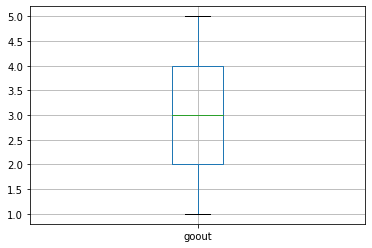

In [51]:
display(pd.DataFrame(math_progress.goout.value_counts(dropna=False)))
display(math_progress.goout.value_counts(dropna=False, normalize=True))
math_progress.boxplot(column=['goout'])

Столбец с номинативными данными без выбросов. В столбце 8 пропущенных значений или 2% от общего числа.

Оставляем столбец без изменений.

### health - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
NaN,15


5.0    0.349367
3.0    0.225316
4.0    0.159494
1.0    0.118987
2.0    0.108861
NaN    0.037975
Name: health, dtype: float64

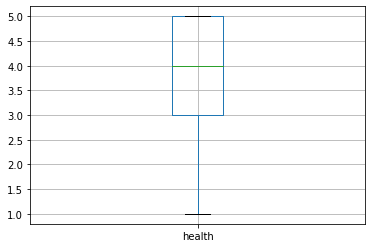

In [52]:
display(pd.DataFrame(math_progress.health.value_counts(dropna=False)))
display(math_progress.health.value_counts(dropna=False, normalize=True))
math_progress.boxplot(column=['health'])

Столбец с номинативными данными без выбросов. В столбце 15 пропущенных значений или 4% от общего числа. 

Оставляем столбец без изменений.

### absences - количество пропущенных занятий

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
NaN,12
14.0,12
3.0,8


0.0      0.289817
2.0      0.156658
4.0      0.138381
6.0      0.080940
8.0      0.054830
10.0     0.044386
12.0     0.031332
14.0     0.031332
3.0      0.020888
16.0     0.018277
7.0      0.015666
5.0      0.013055
18.0     0.013055
20.0     0.010444
22.0     0.007833
9.0      0.007833
1.0      0.007833
15.0     0.005222
13.0     0.005222
11.0     0.005222
25.0     0.002611
54.0     0.002611
385.0    0.002611
26.0     0.002611
56.0     0.002611
24.0     0.002611
212.0    0.002611
21.0     0.002611
75.0     0.002611
30.0     0.002611
19.0     0.002611
38.0     0.002611
40.0     0.002611
23.0     0.002611
17.0     0.002611
28.0     0.002611
Name: absences, dtype: float64

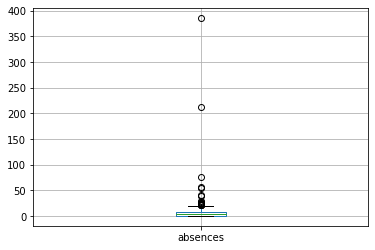

In [53]:
display(pd.DataFrame(math_progress.absences.value_counts(dropna=False)))
display(math_progress.absences.value_counts(normalize=True))
math_progress.boxplot(column=['absences'])

Числовой столбец без пропущенных значений. Основное распределение значений лежит в интервале от 0 до 20 с потенциальными выбросами свыше 20: 

In [54]:
median = math_progress.absences.median()
IQR = math_progress.absences.quantile(
    0.75) - math_progress.absences.quantile(0.25)
perc25 = math_progress.absences.quantile(0.25)
perc75 = math_progress.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                                      l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


С точки зрения здравого смысла значения 212 и 385 являются ошибочными. Исключим строки с данными значениями из дальнейшего рассмотрения: 

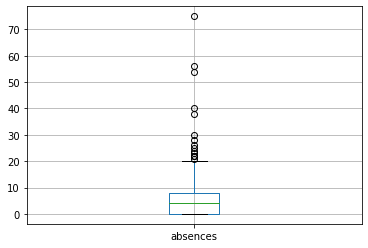

In [24]:
math_progress = math_progress.loc[math_progress.absences <= 100]
math_progress.boxplot(column=['absences'])

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


0.0     0.291339
2.0     0.157480
4.0     0.139108
6.0     0.081365
8.0     0.055118
10.0    0.044619
14.0    0.031496
12.0    0.031496
3.0     0.020997
16.0    0.018373
7.0     0.015748
5.0     0.013123
18.0    0.013123
20.0    0.010499
1.0     0.007874
22.0    0.007874
9.0     0.007874
15.0    0.005249
13.0    0.005249
11.0    0.005249
54.0    0.002625
25.0    0.002625
17.0    0.002625
26.0    0.002625
56.0    0.002625
23.0    0.002625
28.0    0.002625
21.0    0.002625
75.0    0.002625
30.0    0.002625
19.0    0.002625
38.0    0.002625
40.0    0.002625
24.0    0.002625
Name: absences, dtype: float64

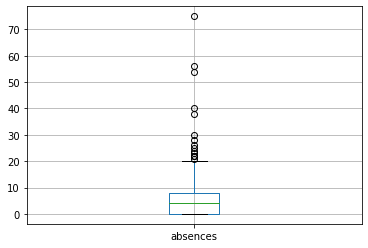

In [25]:
# Проверим, что получилось:
display(pd.DataFrame(math_progress.absences.value_counts()))
display(math_progress.absences.value_counts(normalize=True))
math_progress.boxplot(column=['absences'])

### score - баллы по госэкзамену по математике

,score
50.0,53
55.0,46
0.0,36
65.0,31
75.0,31
40.0,29
60.0,29
70.0,27
45.0,26
80.0,16


50.0     0.139108
55.0     0.120735
0.0      0.094488
65.0     0.081365
75.0     0.081365
40.0     0.076115
60.0     0.076115
70.0     0.070866
45.0     0.068241
80.0     0.041995
30.0     0.039370
90.0     0.028871
35.0     0.023622
25.0     0.018373
95.0     0.013123
NaN      0.013123
85.0     0.007874
100.0    0.002625
20.0     0.002625
Name: score, dtype: float64

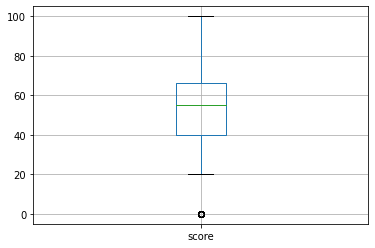

In [56]:
display(pd.DataFrame(math_progress.score.value_counts(dropna=False)))
display(math_progress.score.value_counts(dropna=False, normalize=True))
math_progress.boxplot(column=['score'])

Основной числовой столбец на котором будет строиться модель, с потенциальными выбросами в значении "0". В столбце 5 пропущенных значений или 1% от общего количества.

На данном этапе мы не можем утвержать, что выбросы являются ошибкой. Так как значение "0" содержится в 36 строках датасета это может означать, что некоторые ученики либо не прошли экзамен полностью либо вообще на него не пришли. 

Оставим пока данный столбец без изменений.

## 2. Корреляционный анализ

Корреляционный анализ выполняется как правило для числовых столбцов. В нашем случае это  'age', 'absences' и 'score'. 

Данных для корреляционного анализа у нас не много, поэтому давайте попробуем преобразавать некторые номинативные столбцы в числовые, чтобы наш коррелиционный анализ был более продуктивным. 

В столбце sex всего два значения - это пол ученика ('F' - женский, 'M' - мужской). Давайте заменим эти значения на на числовые 1 и 2, с помощью lambda функции.

In [26]:
math_progress.loc[:, ['sex']].info()
display(pd.DataFrame(math_progress.sex.value_counts(dropna=False)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     381 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


,sex
F,203
M,178


In [27]:
math_progress.sex = math_progress.sex.astype(str).apply(lambda x: 1 if x == 'F'
                                                        else 2)
math_progress.loc[:, ['sex']].info()
display(pd.DataFrame(math_progress.sex.value_counts(dropna=False)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sex     381 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB


E:\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,sex
1,203
2,178


Тепрь сделаем такие же изменения в столбцах:  address, famsize, pstatus, guardian

In [28]:
math_progress.address = math_progress.address.astype(str).apply(lambda x: 1 if x == 'U' else 2
                                                                if x == 'R' else 3)
math_progress.famsize = math_progress.famsize.astype(str).apply(lambda x: 1 if x == 'GT3' else 2
                                                                if x == 'LE3' else 3)
math_progress.pstatus = math_progress.pstatus.astype(str).apply(lambda x: 1 if x == 'A' else 2
                                                                if x == 'T' else 3)
math_progress.guardian = math_progress.guardian.astype(str).apply(lambda x: 1 if x == 'mother' else 2
                                                                  if x == 'father' else 3)

math_progress.loc[:, ['address']].info()
display(pd.DataFrame(math_progress.address.value_counts(dropna=False)))
math_progress.loc[:, ['famsize']].info()
display(pd.DataFrame(math_progress.famsize.value_counts(dropna=False)))
math_progress.loc[:, ['pstatus']].info()
display(pd.DataFrame(math_progress.pstatus.value_counts(dropna=False)))
math_progress.loc[:, ['guardian']].info()
display(pd.DataFrame(math_progress.guardian.value_counts(dropna=False)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   address  381 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB


E:\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,address
1,286
2,80
3,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   famsize  381 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB


,famsize
1,256
2,101
3,24


<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   pstatus  381 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB


,pstatus
2,303
3,43
1,35


<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   guardian  381 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB


,guardian
1,240
2,84
3,57


Чтобы изменить значения в однотипных столбцах schoolsup, famsup, paid, activities, nursery, higher, internet, romantic напишем функцию:

In [30]:
""" Функция получает на вход столбец с данными, заменяет каждое значение на типовое числовое значение 
 и возвращает измененный столбец """


def change_data(column, df):
    df[column] = df[column].astype(str).apply(
        lambda x: 1 if x == 'no' else 2 if x == 'yes' else 3)
    display(pd.DataFrame(df[column].value_counts(dropna=False)))
    print(df.loc[:, [column]].info())
    return df

In [31]:
list_col = 'schoolsup, famsup, paid, activities, nursery, higher, internet, romantic'.strip(
    '\t').split(', ')
for col in list_col:
    change_data(col, math_progress)

<ipython-input-30-83ae5d26b45b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(str).apply(


,schoolsup
1,323
2,49
3,9


<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   schoolsup  381 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB
None


<ipython-input-30-83ae5d26b45b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(str).apply(


,famsup
2,212
1,131
3,38


<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   famsup  381 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB
None


<ipython-input-30-83ae5d26b45b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(str).apply(


,paid
1,194
2,148
3,39


<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   paid    381 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB
None


<ipython-input-30-83ae5d26b45b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(str).apply(


,activities
2,189
1,178
3,14


<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   activities  381 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB
None


<ipython-input-30-83ae5d26b45b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(str).apply(


,nursery
2,289
1,76
3,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   nursery  381 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB
None


<ipython-input-30-83ae5d26b45b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(str).apply(


,higher
2,345
3,19
1,17


<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   higher  381 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB
None


<ipython-input-30-83ae5d26b45b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(str).apply(


,internet
2,293
1,55
3,33


<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   internet  381 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB
None


<ipython-input-30-83ae5d26b45b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(str).apply(


,romantic
1,229
2,121
3,31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   romantic  381 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB
None


Обработка столбцов завершенеа успешно, теперь перейдем непосредственно к корреляционному анализу:

Выясним, какие столбцы коррелируют с оценкой госэкзамена по математике (столбец - "score"). Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

Используем для наглядности матрицу корреляций:

In [38]:
correlation = math_progress.filter(items=['sex', 'age', 'address', 'famsize', 'pstatus', 'medu',
'fedu', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences',
'score']).corr()
correlation

,sex,age,address,famsize,pstatus,medu,fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
sex,1.000000,-0.047586,0.015880,0.081849,0.014694,0.081756,0.024861,0.003523,0.058549,-0.305545,0.031374,-0.075625,-0.174470,-0.043995,0.117604,0.011658,0.001123,0.102302,-0.053219,0.042887,0.227083,0.073043,0.135836,-0.066828,0.105027
age,-0.047586,1.000000,0.139552,0.004529,0.016215,-0.162516,-0.162922,0.231580,0.086465,-0.002322,0.198041,-0.159229,-0.118703,-0.062687,-0.154318,-0.058055,-0.150626,-0.060682,0.042286,0.058081,0.020152,0.113966,-0.073547,0.166773,-0.149349
address,0.015880,0.139552,1.000000,-0.016471,-0.036059,-0.107822,-0.125076,-0.007746,0.244795,0.042952,0.126417,-0.060027,-0.025029,-0.016585,-0.049295,-0.007164,-0.025273,-0.130542,0.031942,0.040137,0.017932,0.006637,0.050037,-0.007664,-0.080153
famsize,0.081849,0.004529,-0.016471,1.000000,-0.020485,-0.058928,-0.139948,-0.096484,0.069690,-0.069210,-0.000198,0.017839,0.016636,-0.054598,0.024168,0.060408,-0.067679,-0.003613,0.030028,-0.012085,0.039555,-0.052395,-0.021255,0.029159,0.017696
pstatus,0.014694,0.016215,-0.036059,-0.020485,1.000000,-0.116130,-0.054565,0.045797,0.126726,-0.015774,-0.005525,-0.018636,0.046414,0.054384,0.055999,-0.109038,-0.019688,-0.006549,0.055684,-0.009776,0.007232,0.032731,0.012175,-0.042418,-0.020732
medu,0.081756,-0.162516,-0.107822,-0.058928,-0.116130,1.000000,0.630981,-0.134302,-0.188118,0.066289,-0.236856,-0.067686,0.155847,0.154509,0.065903,0.117310,0.100833,0.131276,0.026788,-0.025913,0.012492,0.057847,-0.055867,0.097295,0.206289
fedu,0.024861,-0.162922,-0.125076,-0.139948,-0.054565,0.630981,1.000000,0.037210,-0.145161,-0.003513,-0.268503,0.024685,0.099851,0.108827,0.089045,0.105300,0.075203,0.125574,0.011289,-0.031184,-0.029217,0.037715,0.021999,0.040514,0.114440
guardian,0.003523,0.231580,-0.007746,-0.096484,0.045797,-0.134302,0.037210,1.000000,0.066295,0.036780,0.217726,-0.014700,-0.038131,-0.023600,-0.042500,-0.082346,0.022601,0.062621,-0.028151,0.007921,0.051412,0.020338,0.024181,-0.025276,-0.037915
traveltime,0.058549,0.086465,0.244795,0.069690,0.126726,-0.188118,-0.145161,0.066295,1.000000,-0.106861,0.080884,-0.049607,0.049725,-0.028559,-0.003833,-0.035712,0.001292,-0.060562,-0.034162,-0.029956,-0.015613,0.037620,-0.008070,-0.014040,-0.074311
studytime,-0.305545,-0.002322,0.042952,-0.069210,-0.015774,0.066289,-0.003513,0.036780,-0.106861,1.000000,-0.169635,-0.055861,0.050184,0.053826,0.060748,0.077579,0.060079,-0.040164,0.031786,0.032844,-0.125228,-0.047024,-0.083844,-0.067734,0.108754


In [48]:
# Так как у нас получилась большая по объему значений таблица, с которой затруднительно работать
# вручную, используем цикл для проверки коррелирующих значений
for col in correlation.columns:
    for value in correlation[col].unique():
        if 1 < round(value, 3) >= 0.7:
            print(col, round(value, 3))
        elif -1 > round(value, 3) >= -0.7:
            print(col, round(value, 3))

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией heatmap из модуля seaborn:

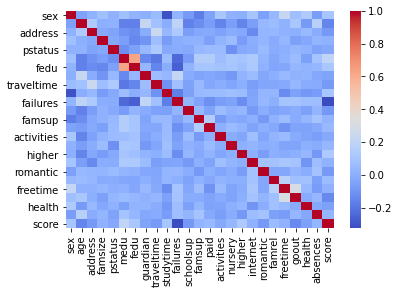

In [88]:
sns.heatmap(correlation, annot=False, cmap='coolwarm')

Вывод: все рассматриваемые числовые переменные слабоскорелированы. Наиболее тесная связь прослеживается между переменной fedu и medu. 

## 3. Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения оценок за экзамен в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: 'school', 'mjob', 'fjob', 'reason'.

Для визуализации корреляции напишем функцию:

In [49]:
'''Функция get_boxplot принимает на вход наименование столбца и возвращает график зависимости значений
столбца от значений столбца score'''


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', data=math_progress, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

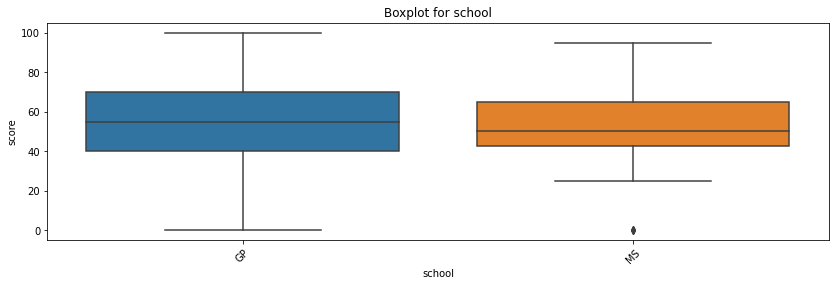

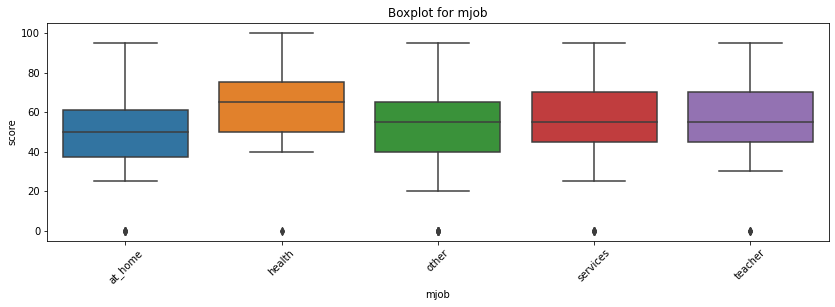

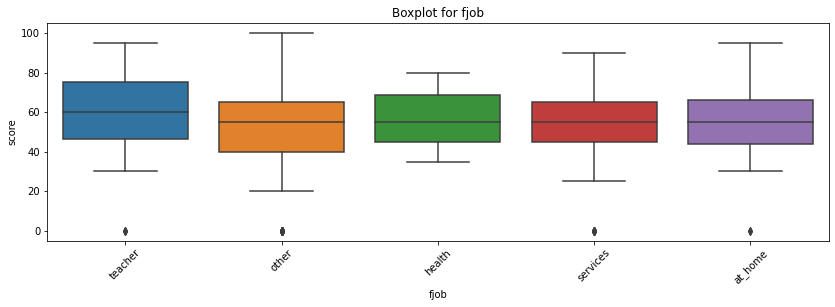

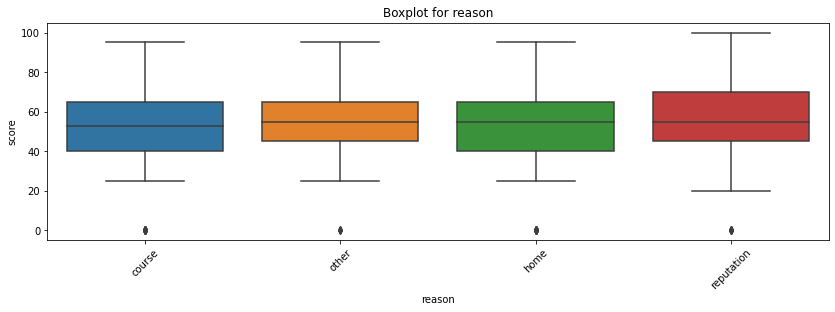

In [50]:
# Передаем в функцию название каждого столбца по отдельности:
for col in ['school', 'mjob', 'fjob', 'reason']:
    get_boxplot(col)

По графикам похоже, что все параметры не влияют на итоговую оценку госэкзамена. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы:

In [51]:
''' Функция принимает на вход наименование столбца и если в столбце присутствует статическая разница 
возвращает сообщение о наличии таковой'''


def get_stat_dif(column):
    cols = math_progress[column].value_counts()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math_progress.loc[math_progress.loc[:, column] == comb[0], 'score'],
                     math_progress.loc[math_progress.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [52]:
for col in ['school', 'mjob', 'fjob', 'reason']:
    get_stat_dif(col)

Как мы видим, параметры номинативных переменных значительно не отличаются, поэтому руководствуясь здравым смыслом оставим в нашем датасете номинативную переменную определяющую название школы - school. 

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score'.

По результатам проведенного анализа сформируем итоговый датасет для нашей модели:

In [53]:
math_progress_for_model = math_progress.filter(items=['school', 'sex', 'age', 'address', 'famsize',
'pstatus', 'medu', 'fedu', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
                                                      'health', 'absences', 'score'])
math_progress_for_model.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,1,18,1,3,1,4.0,4.0,1,2.0,2.0,0.0,2,1,1,1,2,2,3,1,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,1,17,1,1,3,1.0,1.0,2,1.0,2.0,0.0,1,2,1,1,1,2,2,1,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,1,15,1,2,2,1.0,1.0,1,1.0,2.0,3.0,2,1,3,1,2,2,2,3,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,1,15,1,1,2,4.0,2.0,1,1.0,3.0,0.0,1,2,2,2,2,2,2,2,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,1,16,1,1,2,3.0,3.0,2,1.0,2.0,0.0,1,2,2,1,2,2,1,1,4.0,3.0,2.0,5.0,4.0,50.0


## 4. Выводы

1. В данных значительно много пропущенных значений (27 столбцов из 30) и только в 3-х столбцах school, sex, age данные заполнены полностью. Больше всего отсутствуют значения, с превышением 8%, в столбцах pstatus, fjob, famsup, paid, internet.

2. Потенциальные выбросы найдены в столбцах: age, fedu, traveltime, studytime, failures, famrel, freetime, absences, score. Полностью устарен выброс путем устранения ошибки в столбце fedu.  Частично устранены выбросы путем устранения ошибок в столбцах famrel и absences. Наличие выбросов в вышеуказанных столбцах позволяет сделать вывод о том, что данные в них распределены неравномерно

3. Кореляционный анализ числовых переменных показал, что все переменные слабоскорелированы. Наиболее тесная связь прослеживается между переменной medu и fedu.

4. Для построения корректной модели в дальнейшем рекомендуется вернуть датасет на обогащение.